# Diabetes Data Exploration

## Imports and Setups

In [24]:
%load_ext autoreload
%autoreload 2

# This sets up the appropriate logging and path configs
from notebook_setup import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# External Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Import Diabetes Dataset

In [26]:
df = pd.read_csv("data/interim/train.csv", )
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,60.0,0,0,never,19.96,6.5,126,0
1,Female,51.0,0,1,No Info,24.72,6.5,90,0
2,Female,47.0,0,0,No Info,27.32,4.5,155,0
3,Male,6.0,0,0,No Info,16.03,5.8,145,0
4,Female,45.0,1,0,never,36.16,5.7,158,0


## Explore Data

### Raw DF Exploration

In [27]:
df.shape

(80000, 9)

In [28]:
df.drop_duplicates()
df.shape

(80000, 9)

In [29]:
df.nunique(axis=0)

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4102
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [30]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,41.849112,0.075750,0.039212,27.298869,5.527389,138.040188,0.085000
std,22.538844,0.264599,0.194101,6.620805,1.071310,40.737123,0.278883
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.610000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.540000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.220000,9.000000,300.000000,1.000000


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,80000.0,41.849112,22.538844,0.08,24.00,43.00,60.00,80.00
hypertension,80000.0,0.075750,0.264599,0.00,0.00,0.00,0.00,1.00
heart_disease,80000.0,0.039212,0.194101,0.00,0.00,0.00,0.00,1.00
bmi,80000.0,27.298869,6.620805,10.01,23.61,27.32,29.54,95.22
HbA1c_level,80000.0,5.527389,1.071310,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,80000.0,138.040188,40.737123,80.00,100.00,140.00,159.00,300.00
diabetes,80000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


<AxesSubplot:ylabel='Frequency'>

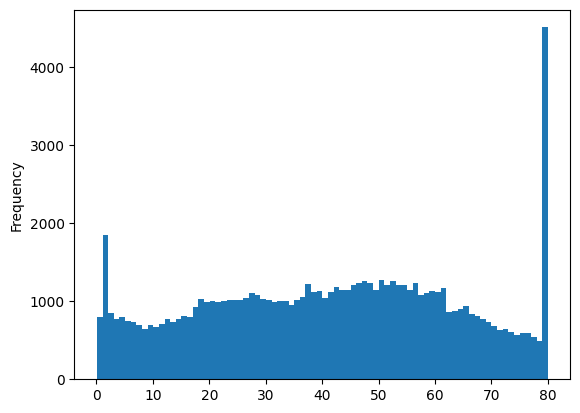

In [40]:
df["age"].plot(kind="hist", bins=80)

<AxesSubplot:xlabel='index', ylabel='diabetes'>

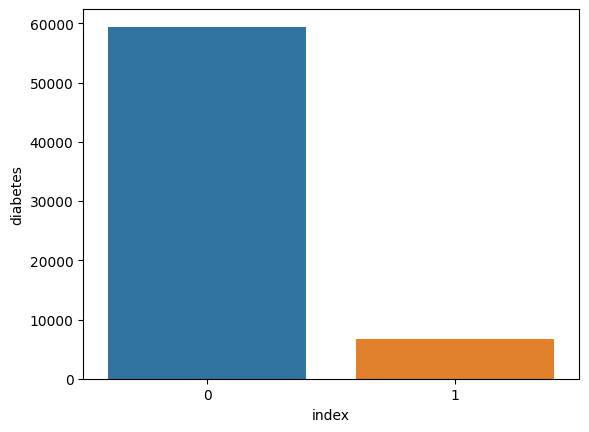

In [51]:
import seaborn as sns

sns.barplot(df.loc[df["age"] >= 18]["diabetes"].value_counts().reset_index(), x="index", y="diabetes")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               80000 non-null  object 
 1   age                  80000 non-null  float64
 2   hypertension         80000 non-null  int64  
 3   heart_disease        80000 non-null  int64  
 4   smoking_history      80000 non-null  object 
 5   bmi                  80000 non-null  float64
 6   HbA1c_level          80000 non-null  float64
 7   blood_glucose_level  80000 non-null  int64  
 8   diabetes             80000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.5+ MB


In [67]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Raw DF Correlations

In [55]:
df.gender.dtype

dtype('O')

<AxesSubplot:>

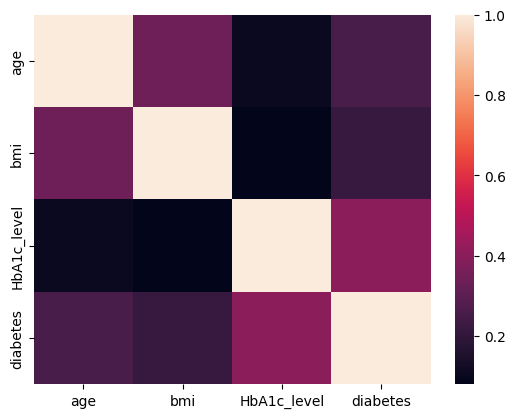

In [74]:
num_cols = ["age", "bmi", "HbA1c_level", "diabetes"]

sns.heatmap(df[num_cols].corr())

In [ ]:
sns.pairplot(df, hue='diabetes')

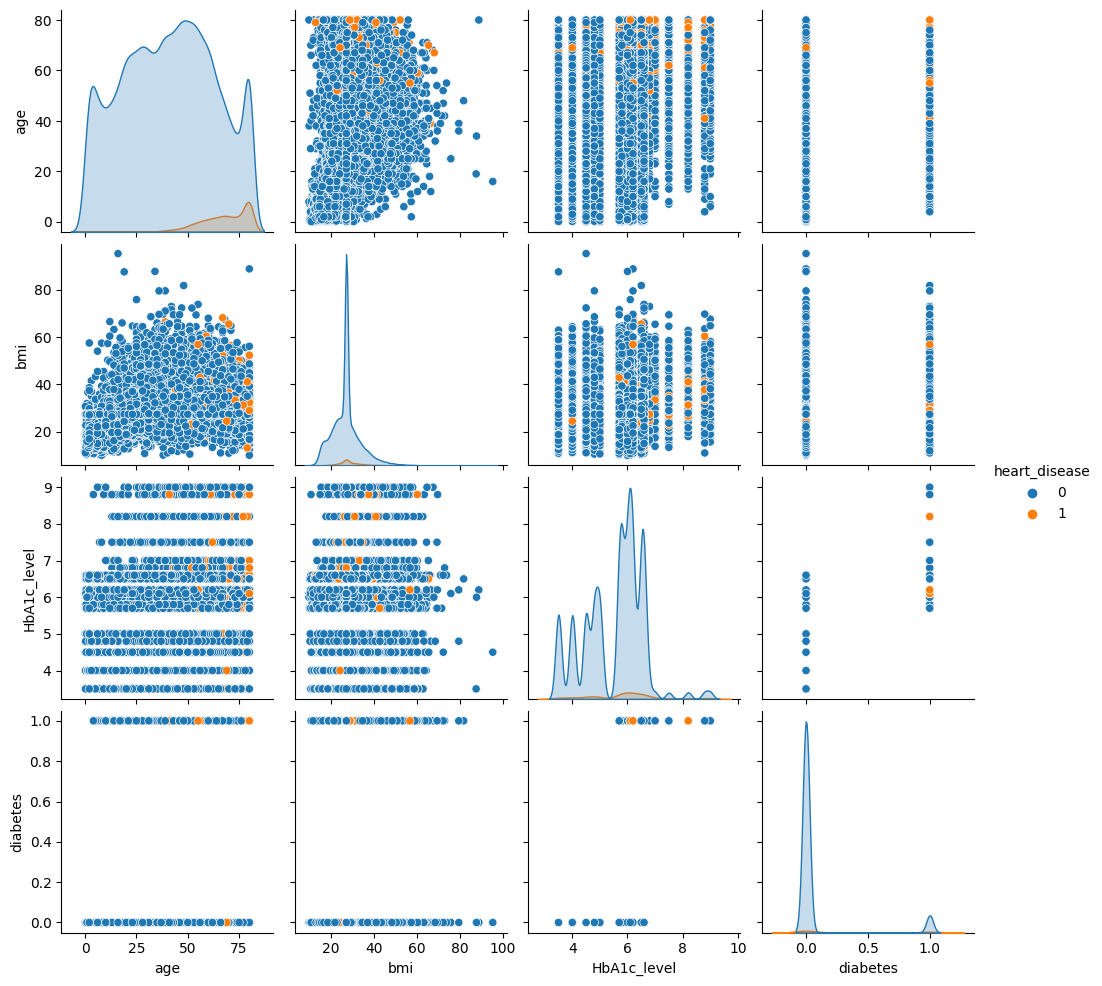

In [77]:
sns.pairplot(df[[*num_cols, "heart_disease"]], hue='heart_disease')

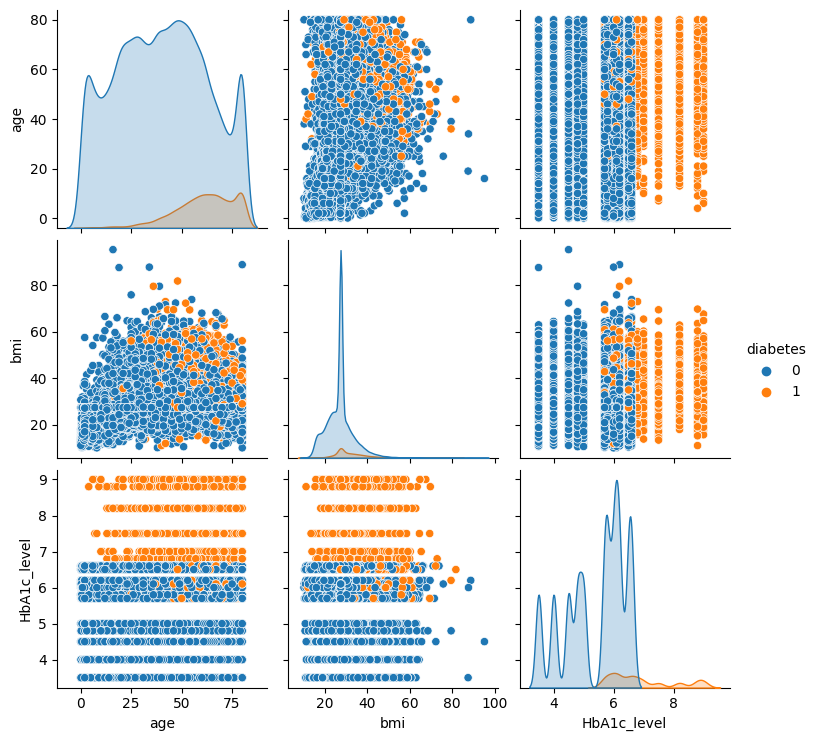

In [78]:
sns.pairplot(df[num_cols], hue='diabetes')

In [80]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [85]:
columns_of_interest = ["age", "smoking_history", "HbA1c_level", "blood_glucose_level"]
for column in columns_of_interest:
    print(f"{column}: {sorted(df[column].unique())}")
    print()

age: [0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]

smoking_history: ['No Info', 'current', 'ever', 'former', 'never', 'not current']

HbA1c_level: [3.5, 4.0, 4.5, 4.8, 5.0, 5.7, 5.8, 6.0, 6.1, 6.2, 6.5, 6.6, 6.8, 7.0, 7.5, 8.2, 8.8, 9.0]

blood_glucose_level: [80, 85, 90, 100, 126, 130, 140, 145, 155, 158, 159, 160, 200, 220, 240, 260, 280, 300]

